In [1]:
using Flux, Flux.Data.MNIST, Images
using Flux: onehotbatch, argmax, crossentropy, throttle
using Base.Iterators: repeated, partition
#using CuArrays

,,,,,,,,,

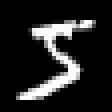
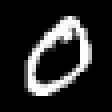
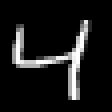
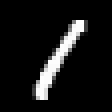
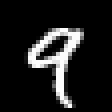
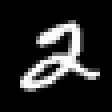
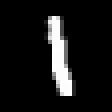
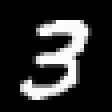
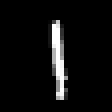
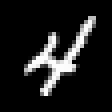

In [2]:
imgs = MNIST.images()

labels = gpu(collect(onehotbatch(MNIST.labels(), 0:9)))

imgs[1:10]

In [3]:
# Partition into batches of size 1,000
train = [(gpu(cat(4, float.(imgs[i])...)), labels[:,i])
         for i in partition(1:60_000, 1000)]

# Prepare test set (first 1,000 images)
tX = gpu(cat(4, float.(MNIST.images(:test)[1:1000])...))
tY = gpu(onehotbatch(MNIST.labels(:test)[1:1000], 0:9));

![CNN](http://cs231n.github.io/assets/cnn/depthcol.jpeg)

In [17]:
m = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x, :, size(x, 4)),
  Dense(288, 10), softmax)

m = gpu(m)

loss(x, y) = crossentropy(m(x), y)

loss (generic function with 1 method)

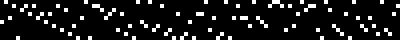

In [18]:
Gray.(collect(labels[:,1:100]))

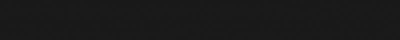

In [19]:
Gray.(collect(m(train[1][1]).data)[:,1:100])

In [20]:
evalcb = throttle(5) do
    display(Gray.(collect(m(train[1][1]).data)[:,1:100]))
end

(::throttled) (generic function with 1 method)

In [ ]:
Flux.train!(loss, train, ADAM(params(m)), cb = evalcb)

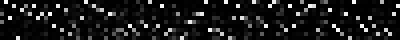

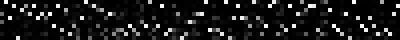

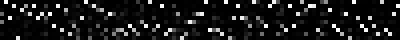

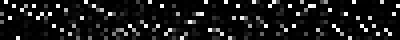

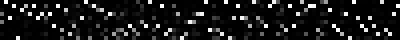

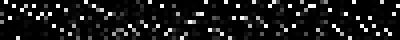

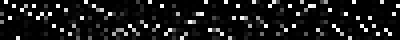

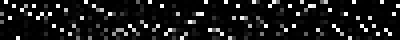

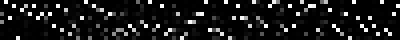

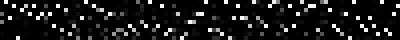

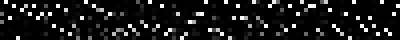

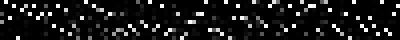

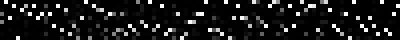

In [12]:
Flux.train!(loss, train, ADAM(params(m)), cb = evalcb)

Test set accuracy.

In [13]:
mean(argmax(m(tX)) .== argmax(tY))

0.834